<a href="https://colab.research.google.com/github/soumilsuri/ML-DeepLearning-small-projects-/blob/main/FaceRecognitionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎬**Hollywood Celebrity Facial Recognition Dataset**

This notebook is made by
Soumil Suri
https://github.com/soumilsuri

DATASET USED : https://www.kaggle.com/datasets/bhaveshmittal/celebrity-face-recognition-dataset/data

This dataset features iconic images of 17 *Hollywood Celebrity* .

# Step 1 : Preprocessing and Visualizations

***
**Folder Structure:**

*   Celeb_face_data: The main directory containing subdirectories for each celebrity.
*   Each subdirectory contains images of that celebrity.

**Split Ratios:**
Training: 80%
Testing: 10%
Validation: 10%

In [1]:
import os
import shutil
import random

# Define paths
base_dir = '/content/drive/MyDrive/Celeb_face_data'
train_dir = 'Celeb_face_data_train'
test_dir = 'Celeb_face_data_test'
val_dir = 'Celeb_face_data_val'

# Create directories for training, testing, and validation
for directory in [train_dir, test_dir, val_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Get the list of celebrities
celebrities = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
celebrities

['Denzel Washington',
 'Angelina Jolie',
 'Leonardo DiCaprio',
 'Johnny Depp',
 'Jennifer Lawrence',
 'Kate Winslet',
 'Natalie Portman',
 'Megan Fox',
 'Brad Pitt',
 'Hugh Jackman',
 'Nicole Kidman',
 'Sandra Bullock',
 'Scarlett Johansson',
 'Will Smith',
 'Tom Cruise',
 'Tom Hanks',
 'Robert Downey Jr']

In [2]:
# Split the data
for celebrity in celebrities:
    celeb_path = os.path.join(base_dir, celebrity)
    images = os.listdir(celeb_path)
    random.shuffle(images)

    # Calculate split indices
    total_images = len(images)
    train_idx = int(0.8 * total_images)
    val_idx = int(0.1 * total_images) + train_idx

    train_images = images[:train_idx]
    val_images = images[train_idx:val_idx]
    test_images = images[val_idx:]

    # Define destination directories
    celeb_train_dir = os.path.join(train_dir, celebrity)
    celeb_val_dir = os.path.join(val_dir, celebrity)
    celeb_test_dir = os.path.join(test_dir, celebrity)

    # Create subdirectories
    for directory in [celeb_train_dir, celeb_val_dir, celeb_test_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)

    # Copy images to respective directories
    for image in train_images:
        shutil.copy(os.path.join(celeb_path, image), celeb_train_dir)

    for image in val_images:
        shutil.copy(os.path.join(celeb_path, image), celeb_val_dir)

    for image in test_images:
        shutil.copy(os.path.join(celeb_path, image), celeb_test_dir)

print("Data has been split into training, testing, and validation sets.")

Data has been split into training, testing, and validation sets.


In [3]:
# Count and print the number of photos in the training folder
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

print("Number of images in each folder in the training set:")
for celebrity in celebrities:
    celeb_train_dir = os.path.join(train_dir, celebrity)
    num_images = count_images(celeb_train_dir)
    print(f"  {celebrity}: {num_images} images")

Number of images in each folder in the training set:
  Denzel Washington: 80 images
  Angelina Jolie: 80 images
  Leonardo DiCaprio: 80 images
  Johnny Depp: 80 images
  Jennifer Lawrence: 80 images
  Kate Winslet: 80 images
  Natalie Portman: 80 images
  Megan Fox: 80 images
  Brad Pitt: 80 images
  Hugh Jackman: 80 images
  Nicole Kidman: 80 images
  Sandra Bullock: 80 images
  Scarlett Johansson: 160 images
  Will Smith: 80 images
  Tom Cruise: 80 images
  Tom Hanks: 80 images
  Robert Downey Jr: 80 images


***
From the above output it is clear that there is class imbalance in the data

![Class-imbalance](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*l3NEnB5bThd0uqxVe5Mbqg.jpeg)
***
To resolve the class imbalance where Scarlett Johansson has 160 images while other celebrities have 80 images each, you can perform the following steps:

1. Reduce the number of images for Scarlett Johansson to match other classes (e.g., 80 images).
2. Augment the images of other classes to increase the number to match Scarlett Johansson (e.g., 160 images).

Here, we will go with the second step using the *imgaug library*

In [4]:
import os
import random
import imgaug.augmenters as iaa
from PIL import Image
import numpy as np

# Define paths
train_dir = 'Celeb_face_data_train'

# Image Augmentation Sequence
aug = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip 50% of the time
    iaa.Affine(rotate=(-20, 20)),  # Rotate by -20 to +20 degrees
    iaa.Multiply((0.8, 1.2))  # Change brightness
])

# Get the list of celebrities
celebrities = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

for celebrity in celebrities:
    celeb_train_dir = os.path.join(train_dir, celebrity)
    images = os.listdir(celeb_train_dir)

    if len(images) < 180:
        images_to_augment = random.choices(images, k=180 - len(images))

        for image in images_to_augment:
            image_path = os.path.join(celeb_train_dir, image)
            img = Image.open(image_path)
            img_array = np.array(img)
            img_aug = aug(image=img_array)
            img_aug = Image.fromarray(img_aug)

            # Save augmented image
            new_image_path = os.path.join(celeb_train_dir, f'aug_{random.randint(0, 1e6)}.jpg')
            img_aug.save(new_image_path)

print("Augmented images to balance classes.")

Augmented images to balance classes.


In [5]:
# Count and print the number of photos in the training folder
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

print("Number of images in each folder in the training set:")
for celebrity in celebrities:
    celeb_train_dir = os.path.join(train_dir, celebrity)
    num_images = count_images(celeb_train_dir)
    print(f"  {celebrity}: {num_images} images")

Number of images in each folder in the training set:
  Kate Winslet: 180 images
  Hugh Jackman: 180 images
  Tom Cruise: 180 images
  Megan Fox: 180 images
  Will Smith: 180 images
  Tom Hanks: 180 images
  Sandra Bullock: 180 images
  Natalie Portman: 180 images
  Angelina Jolie: 180 images
  Robert Downey Jr: 180 images
  Nicole Kidman: 180 images
  Denzel Washington: 180 images
  Brad Pitt: 180 images
  Scarlett Johansson: 180 images
  Johnny Depp: 180 images
  Jennifer Lawrence: 180 images
  Leonardo DiCaprio: 180 images


***
Image sample from each class

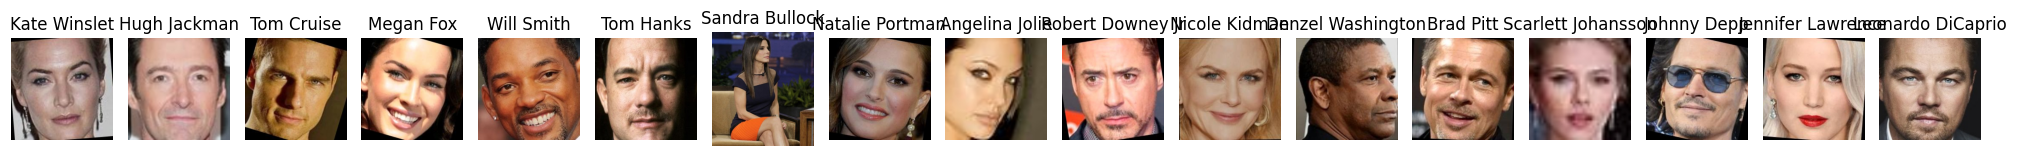

In [6]:
import matplotlib.pyplot as plt

# Define the training directory
train_dir = 'Celeb_face_data_train'

# Get the list of celebrities
celebrities = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Plot one image of each celebrity
fig, axes = plt.subplots(1, len(celebrities), figsize=(20, 5))

for ax, celebrity in zip(axes, celebrities):
    celeb_train_dir = os.path.join(train_dir, celebrity)
    images = os.listdir(celeb_train_dir)

    if images:
        # Select a random image
        image_path = os.path.join(celeb_train_dir, random.choice(images))
        image = Image.open(image_path)

        # Plot the image
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(celebrity)

plt.tight_layout()
plt.show()

***
Augmented image sample


Sample augmented images from each class:


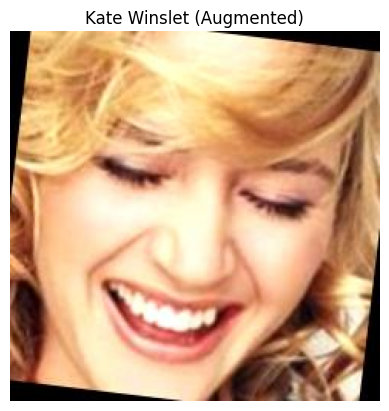

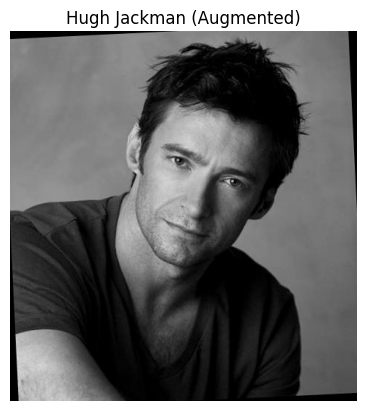

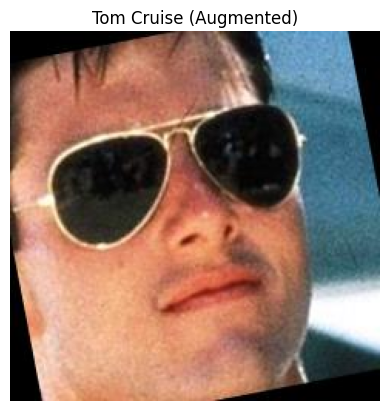

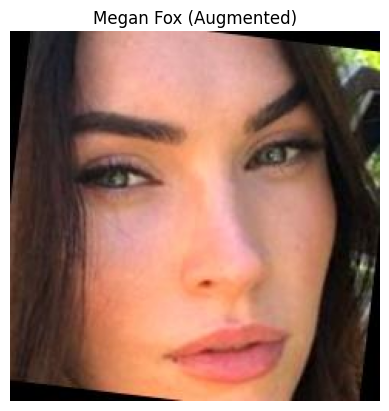

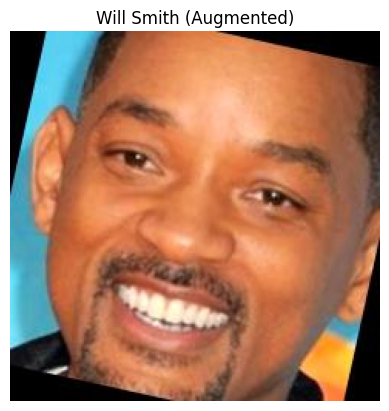

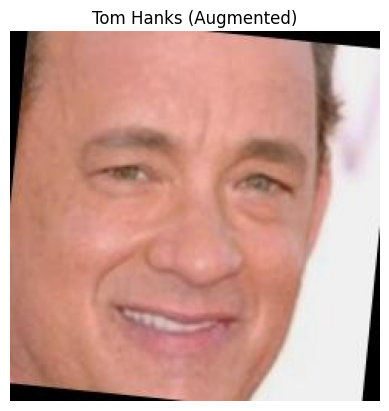

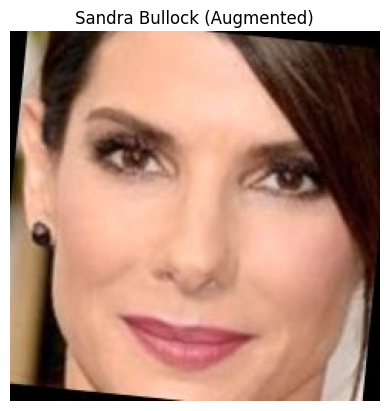

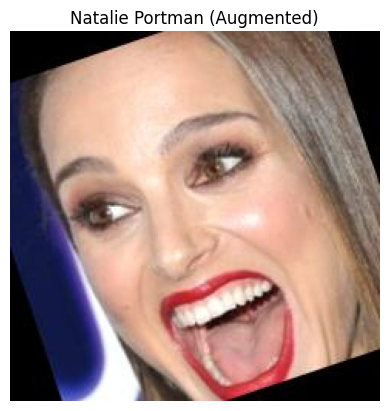

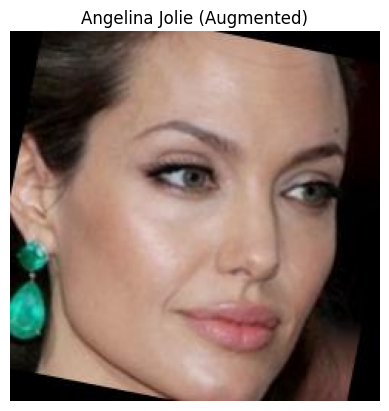

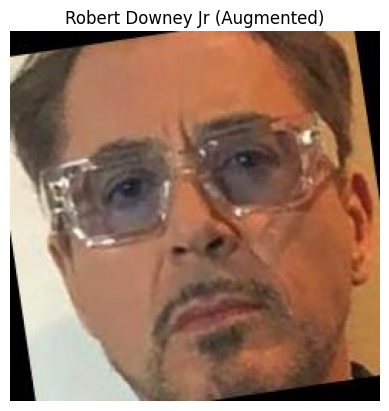

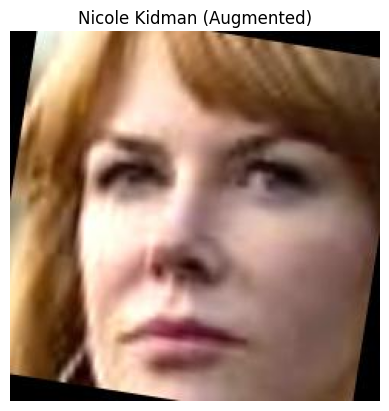

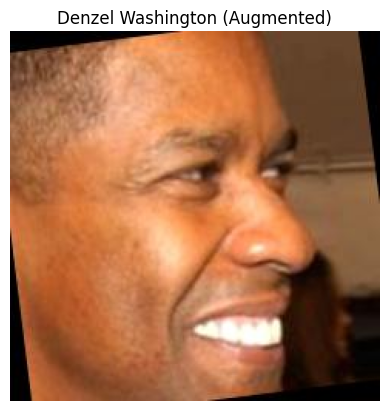

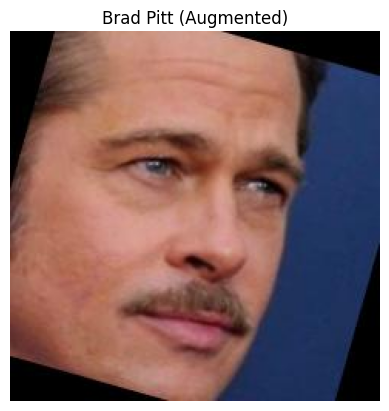

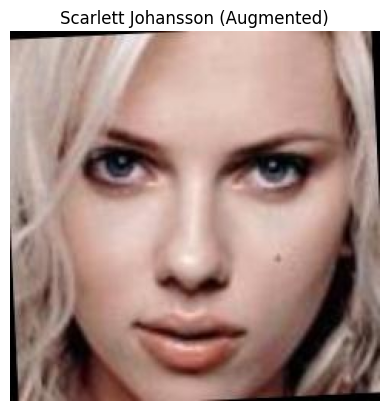

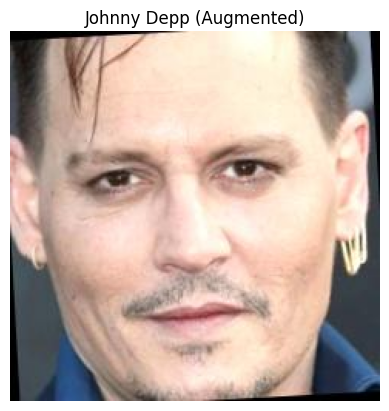

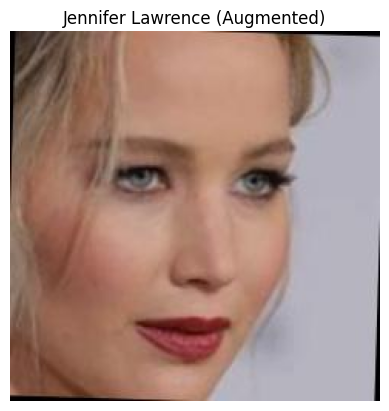

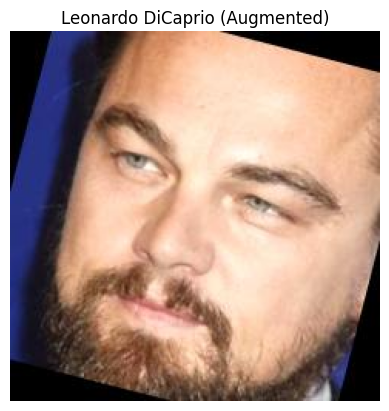

In [7]:
# Print augmented images from each class
print("\nSample augmented images from each class:")
for celebrity in celebrities:
    celeb_train_dir = os.path.join(train_dir, celebrity)
    images = os.listdir(celeb_train_dir)

    # Filter to find only the augmented images
    aug_images = [img for img in images if img.startswith('aug_')]

    if aug_images:
        # Select a random augmented image
        image_path = os.path.join(celeb_train_dir, random.choice(aug_images))
        image = Image.open(image_path)

        # Plot the image
        plt.figure()
        plt.imshow(image)
        plt.title(f"{celebrity} (Augmented)")
        plt.axis('off')

plt.show()

***
# CNN (Convolutional Neural Network)
A Convolutional Neural Network (CNN) is a type of artificial neural network (ANN) commonly used in analyzing visual imagery. It's specifically designed to process data that has a grid-like topology, such as images. CNNs are made up of several layers, each with a specific function in the process of extracting features from the input data.

Components of a CNN:
1. Convolutional Layers: These layers apply a set of learnable filters to the input data. Each filter detects specific features in the input, such as edges, textures, or patterns. The output of applying these filters is called feature maps.
2. Pooling Layers: Pooling layers downsample the feature maps generated by the convolutional layers. This helps reduce the dimensionality of the data and makes the model more computationally efficient. Common pooling operations include max pooling, which retains the maximum value in each region, and average pooling, which calculates the average value.
3. Fully Connected Layers: After several convolutional and pooling layers, the high-level features are extracted from the input data. These features are then flattened and fed into one or more fully connected layers, also known as dense layers. These layers perform classification based on the features extracted by the earlier layers.
4. Dropout: Dropout is a regularization technique commonly used in CNNs to prevent overfitting. It randomly drops a certain percentage of neurons during training, forcing the network to learn more robust features.
![CNN](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

In [51]:
#importing libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define directories
train_dir = 'Celeb_face_data_train'
val_dir = 'Celeb_face_data_val'
test_dir = 'Celeb_face_data_test'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Rescale images and generate data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 3060 images belonging to 17 classes.
Found 180 images belonging to 17 classes.
Found 180 images belonging to 17 classes.


***
Structure of our CNN model

In [9]:
# Define the CNN model
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

We define an EarlyStopping callback, specifying to monitor validation accuracy (monitor='val_accuracy'), patience of 3 epochs (patience=3), and to restore the best weights when training stops (restore_best_weights=True).

In [11]:
# Compile the model
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [12]:
# Train the model with early stopping
epochs = 50
history = model_1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping])

Epoch 1/50
95/95 [==============================] - 20s 110ms/step - loss: 2.7835 - accuracy: 0.0882 - val_loss: 2.5293 - val_accuracy: 0.1875
Epoch 2/50
95/95 [==============================] - 4s 45ms/step - loss: 2.3493 - accuracy: 0.2441 - val_loss: 1.9920 - val_accuracy: 0.4000
Epoch 3/50
95/95 [==============================] - 5s 51ms/step - loss: 1.8224 - accuracy: 0.4049 - val_loss: 1.5777 - val_accuracy: 0.4938
Epoch 4/50
95/95 [==============================] - 5s 53ms/step - loss: 1.4526 - accuracy: 0.5337 - val_loss: 1.2990 - val_accuracy: 0.5375
Epoch 5/50
95/95 [==============================] - 4s 43ms/step - loss: 1.1251 - accuracy: 0.6275 - val_loss: 1.2115 - val_accuracy: 0.6375
Epoch 6/50
95/95 [==============================] - 5s 55ms/step - loss: 0.8526 - accuracy: 0.7163 - val_loss: 1.0489 - val_accuracy: 0.6687
Epoch 7/50
95/95 [==============================] - 4s 45ms/step - loss: 0.6920 - accuracy: 0.7704 - val_loss: 1.0591 - val_accuracy: 0.6938
Epoch 8/50


***
Evaluating the model

In [13]:
# Evaluate the model on test data
print("\nEvaluating the model on test data:")
test_loss, test_accuracy = model_1.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Evaluating the model on test data:
6/6 [==============================] - 0s 60ms/step - loss: 1.0334 - accuracy: 0.7222
Test Loss: 1.033435344696045
Test Accuracy: 0.7222222089767456


**Loss Curve:** A graphical representation illustrating the evolution of the loss function during the training of a machine learning model over successive epochs or iterations. The loss curve typically consists of two lines: one for the training loss and another for the validation loss. It provides insights into the convergence and generalization of the model, with decreasing values indicating improvement in the model's performance. Analyzing the loss curve helps in diagnosing issues such as overfitting or underfitting and optimizing model hyperparameters.

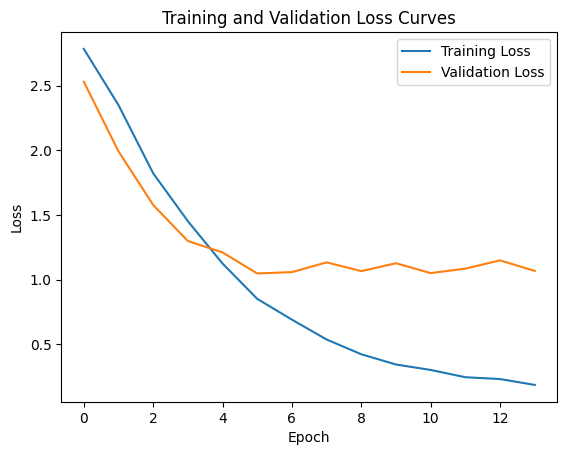

In [37]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss curves
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

In [56]:
# Make predictions on test data using the CNN model
y_pred = model_1.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = sorted(os.listdir(test_dir))

6/6 [==============================] - 0s 55ms/step



**Confusion Matrix:** A compact table summarizing the counts of true positive, true negative, false positive, and false negative predictions made by a classification model. It compares predicted class labels with true class labels, highlighting correct predictions on the main diagonal and misclassifications in off-diagonal cells. Confusion matrices are crucial for evaluating and understanding a model's performance in classification tasks.

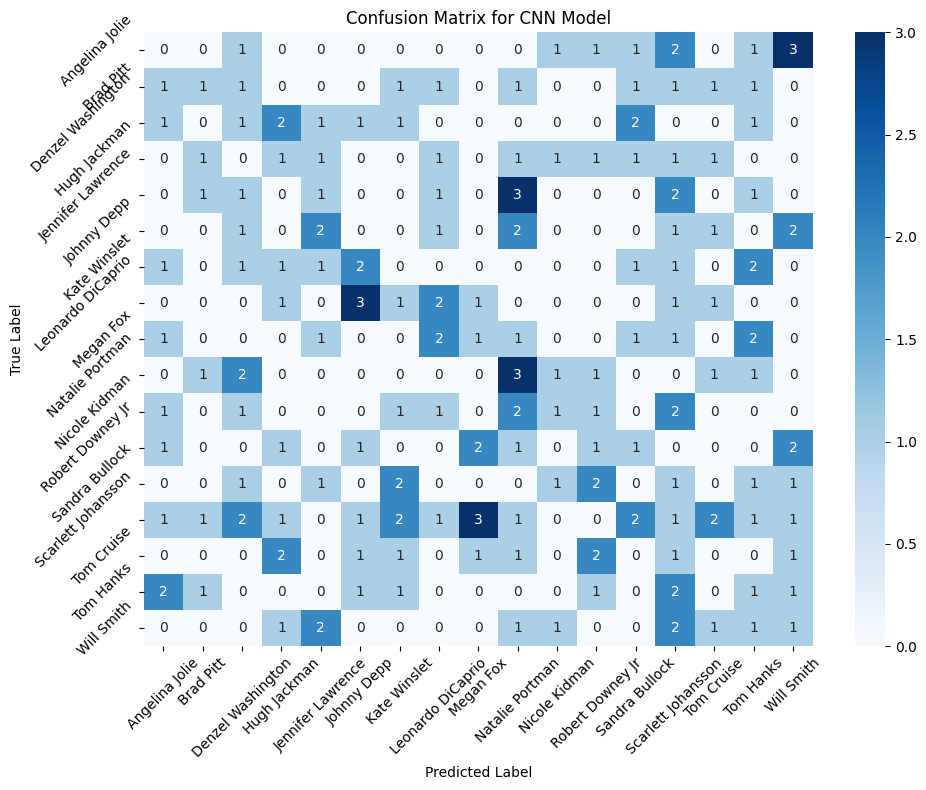

In [53]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN Model')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

**ROC Curve and AUC:** If your problem is binary classification or you have a way to binarize the multiclass problem, you can plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) score. This can provide insights into the model's performance across different thresholds.

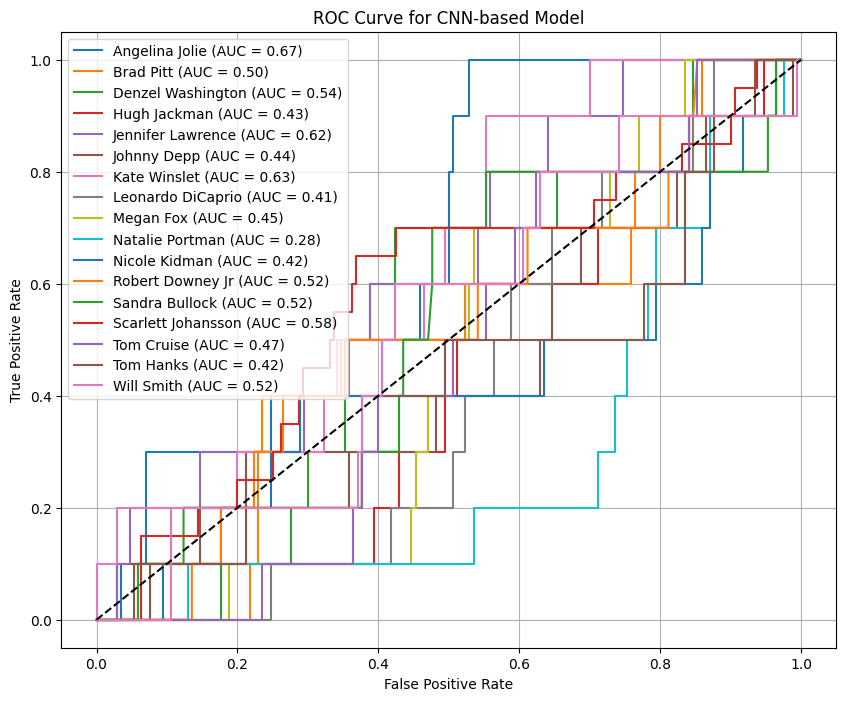

In [60]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve((y_true == i), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN-based Model')
plt.legend()
plt.grid(True)
plt.show()

**Precision-Recall Curve:** Similar to the ROC curve, the Precision-Recall curve plots precision against recall for different thresholds. It can be particularly useful when dealing with imbalanced datasets.

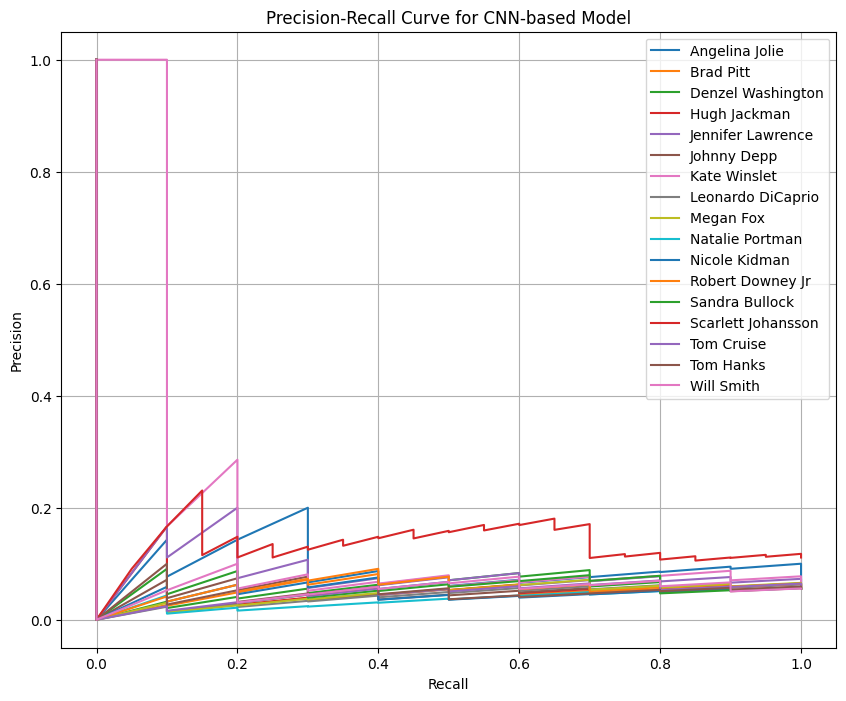

In [61]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve for each class
precision = {}
recall = {}
for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve((y_true == i), y_pred[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label=f'{class_labels[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for CNN-based Model')
plt.legend()
plt.grid(True)
plt.show()

**Mean Class Accuracy:** Compute and visualize the mean class accuracy, which calculates the average accuracy across all classes. This metric can provide a single value to evaluate the overall performance of the model.

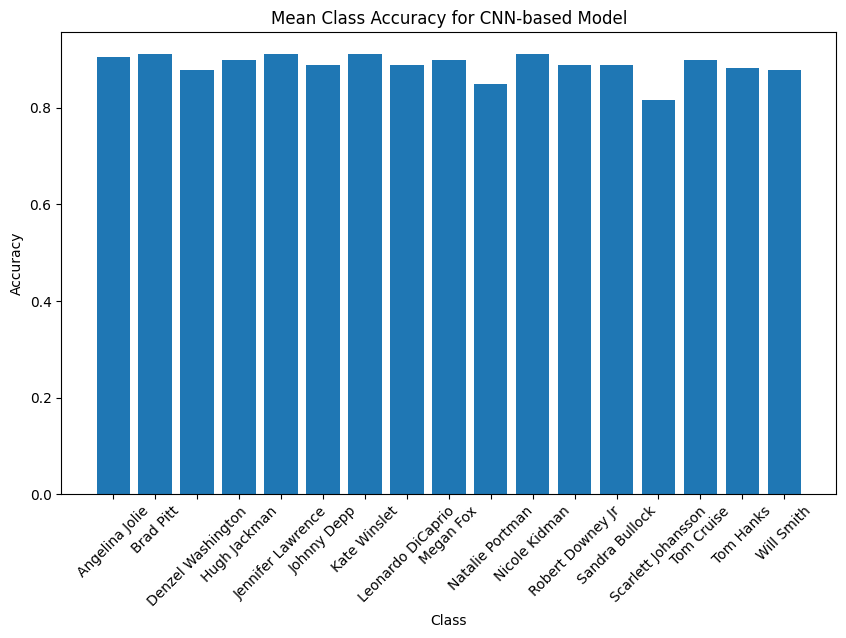

In [62]:
from sklearn.metrics import accuracy_score

# Compute accuracy for each class
class_accuracy = {}
for i in range(len(class_labels)):
    class_accuracy[class_labels[i]] = accuracy_score((y_true == i), (y_pred_classes == i))

# Plot mean class accuracy
plt.figure(figsize=(10, 6))
plt.bar(class_accuracy.keys(), class_accuracy.values())
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Mean Class Accuracy for CNN-based Model')
plt.xticks(rotation=45)
plt.show()

Saving the model in .h5 file

In [15]:
# Save the model
model_1.save('celeb_face_classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


***
# VGG16
VGG16 is a convolutional neural network architecture proposed by Karen Simonyan and Andrew Zisserman from the Visual Geometry Group (VGG) at the University of Oxford. It was introduced in the paper titled "Very Deep Convolutional Networks for Large-Scale Image Recognition" in 2014. VGG16 is known for its simplicity and uniform architecture, making it easy to understand and implement.

**Architecture of VGG16:**
1. Input Layer: VGG16 takes an input image of size 224x224 pixels with three color channels (RGB).

2. Convolutional Layers: VGG16 consists of 13 convolutional layers, each followed by a rectified linear unit (ReLU) activation function. These layers use small 3x3 filters with a stride of 1 and pad the input to maintain spatial resolution.

3. Max Pooling Layers: After every two convolutional layers, VGG16 includes max pooling layers with a 2x2 window and a stride of 2. Max pooling reduces the spatial dimensions of the feature maps, making the network more computationally efficient.

4. Fully Connected Layers: The convolutional layers are followed by three fully connected layers, also known as dense layers. These layers perform high-level reasoning and classification based on the features extracted by the convolutional layers.

5. Output Layer: The final layer of VGG16 is a softmax output layer with 1000 units, corresponding to the 1000 classes in the ImageNet dataset. Each unit represents the probability of the input image belonging to a particular class.

![VGG16](https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16-1024x450.jpg)

In [23]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16

# Define directories
train_dir = 'Celeb_face_data_train'
val_dir = 'Celeb_face_data_val'
test_dir = 'Celeb_face_data_test'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional base
base_model.trainable = False

# Rescale images and generate data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 3060 images belonging to 17 classes.
Found 180 images belonging to 17 classes.
Found 180 images belonging to 17 classes.


In [30]:
# Add custom classification layers on top of VGG16
model_2 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(os.listdir(train_dir)), activation='softmax')  # Number of classes
])

**Trainable Parameters vs. Non-trainable Parameters:**

**Trainable Parameters:** Trainable parameters are the weights and biases in the model that are updated during the training process using gradient descent optimization algorithms. In VGG16, the trainable parameters include the weights of convolutional filters and the weights and biases of the fully connected layers. These parameters are learned from the data during training to minimize the loss function.

**Non-trainable Parameters:** Non-trainable parameters, also known as frozen parameters, are the weights and biases in the model that remain fixed during training. In VGG16, the convolutional base, which consists of the convolutional and max pooling layers, is typically frozen to preserve the pre-trained weights learned from the ImageNet dataset. By freezing the convolutional base, we prevent it from being updated during training, which helps retain the learned features and speeds up convergence.

In [31]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               12845568  
                                                                 
 dense_13 (Dense)            (None, 17)                8721      
                                                                 
Total params: 27568977 (105.17 MB)
Trainable params: 12854289 (49.04 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [32]:
# Compile the model
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [33]:
# Train the model with early stopping
epochs = 50
history_1 = model_2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping])

Epoch 1/50
95/95 [==============================] - 28s 214ms/step - loss: 2.3960 - accuracy: 0.5069 - val_loss: 0.8844 - val_accuracy: 0.7688
Epoch 2/50
95/95 [==============================] - 14s 146ms/step - loss: 0.3829 - accuracy: 0.9191 - val_loss: 0.7930 - val_accuracy: 0.7688
Epoch 3/50
95/95 [==============================] - 14s 150ms/step - loss: 0.1428 - accuracy: 0.9828 - val_loss: 0.6098 - val_accuracy: 0.8375
Epoch 4/50
95/95 [==============================] - 14s 143ms/step - loss: 0.0590 - accuracy: 0.9983 - val_loss: 0.6190 - val_accuracy: 0.8125
Epoch 5/50
95/95 [==============================] - 14s 147ms/step - loss: 0.0310 - accuracy: 0.9993 - val_loss: 0.5958 - val_accuracy: 0.8625
Epoch 6/50
95/95 [==============================] - 15s 158ms/step - loss: 0.0201 - accuracy: 0.9997 - val_loss: 0.6326 - val_accuracy: 0.8375
Epoch 7/50
95/95 [==============================] - 14s 141ms/step - loss: 0.0151 - accuracy: 0.9997 - val_loss: 0.6022 - val_accuracy: 0.8313

Evaluating the model


In [35]:
# Evaluate the model on test data
print("\nEvaluating the model on test data:")
test_loss, test_accuracy = model_2.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Evaluating the model on test data:
6/6 [==============================] - 1s 124ms/step - loss: 0.4132 - accuracy: 0.8778
Test Loss: 0.41323551535606384
Test Accuracy: 0.8777777552604675


**Loss Curve:** A graphical representation illustrating the evolution of the loss function during the training of a machine learning model over successive epochs or iterations. The loss curve typically consists of two lines: one for the training loss and another for the validation loss. It provides insights into the convergence and generalization of the model, with decreasing values indicating improvement in the model's performance. Analyzing the loss curve helps in diagnosing issues such as overfitting or underfitting and optimizing model hyperparameters.

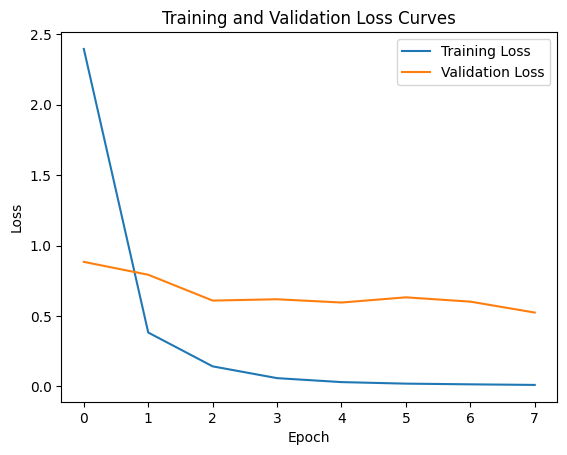

In [38]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history_1.history['loss']
validation_loss = history_1.history['val_loss']

# Plot loss curves
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

In [39]:
# Make predictions on test data using the VGG16-based model
y_pred = model_2.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

6/6 [==============================] - 1s 141ms/step



**Confusion Matrix:** A compact table summarizing the counts of true positive, true negative, false positive, and false negative predictions made by a classification model. It compares predicted class labels with true class labels, highlighting correct predictions on the main diagonal and misclassifications in off-diagonal cells. Confusion matrices are crucial for evaluating and understanding a model's performance in classification tasks.

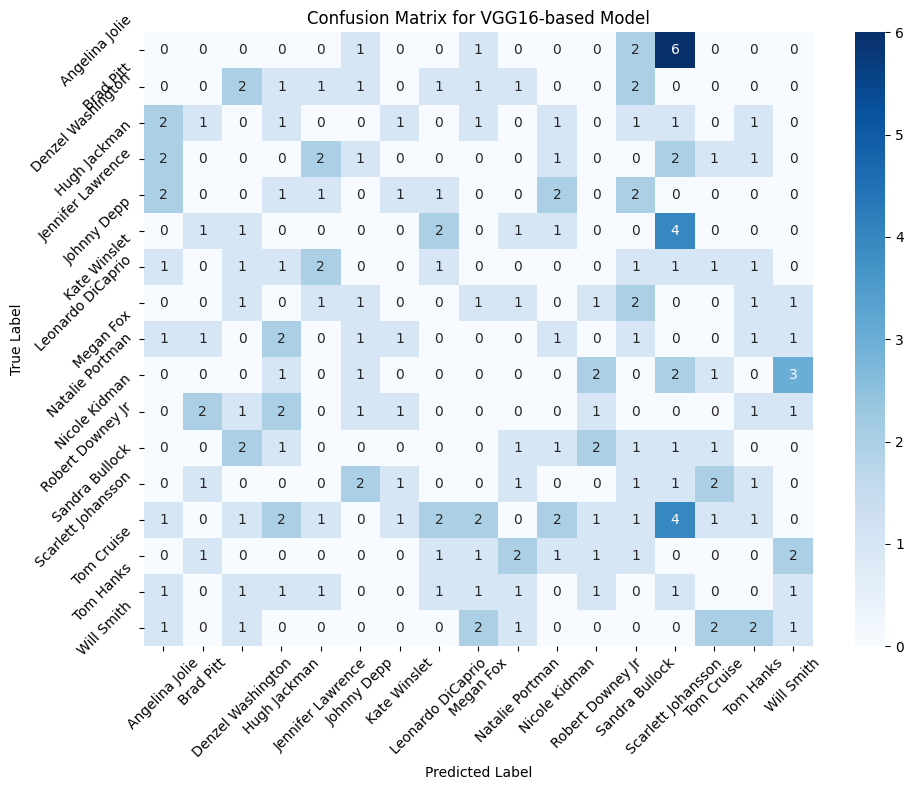

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Get class labels
class_labels = sorted(os.listdir(test_dir))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for VGG16-based Model')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

**ROC Curve and AUC:** If your problem is binary classification or you have a way to binarize the multiclass problem, you can plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) score. This can provide insights into the model's performance across different thresholds.

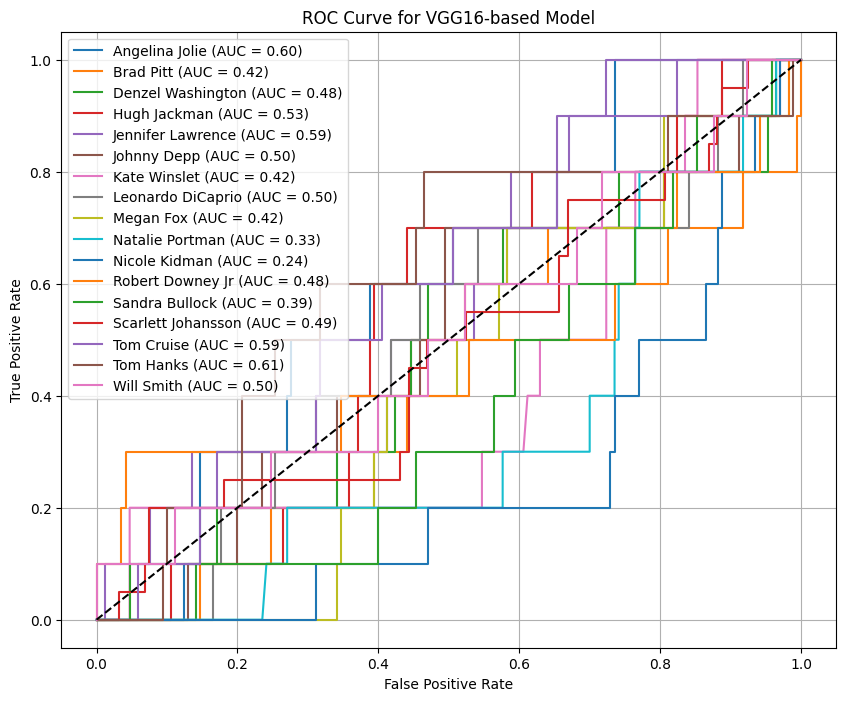

In [45]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve((y_true == i), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for VGG16-based Model')
plt.legend()
plt.grid(True)
plt.show()

**Precision-Recall Curve:** Similar to the ROC curve, the Precision-Recall curve plots precision against recall for different thresholds. It can be particularly useful when dealing with imbalanced datasets.

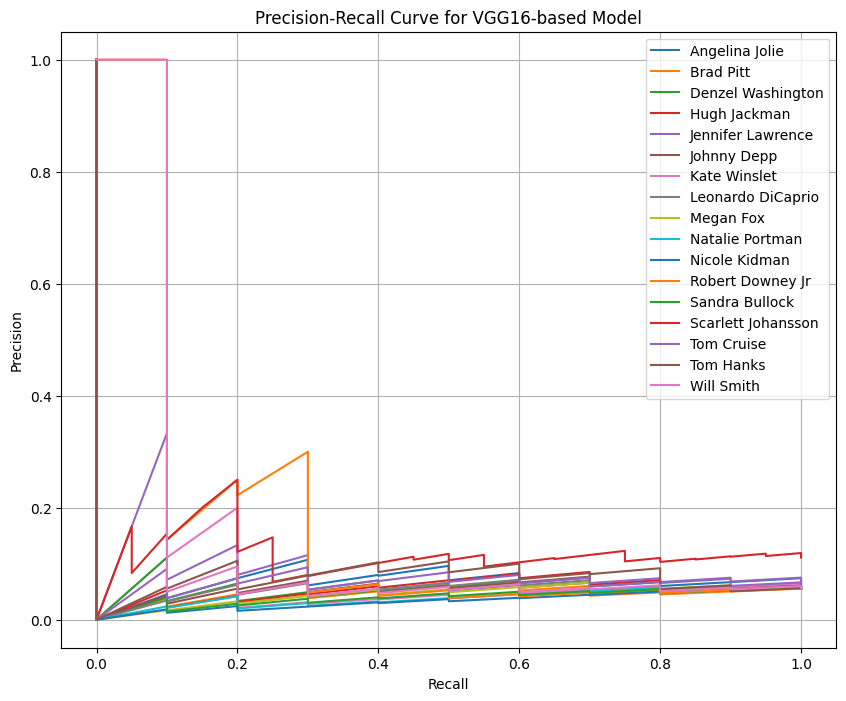

In [44]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve for each class
precision = {}
recall = {}
for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve((y_true == i), y_pred[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label=f'{class_labels[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for VGG16-based Model')
plt.legend()
plt.grid(True)
plt.show()

**Mean Class Accuracy:** Compute and visualize the mean class accuracy, which calculates the average accuracy across all classes. This metric can provide a single value to evaluate the overall performance of the model.

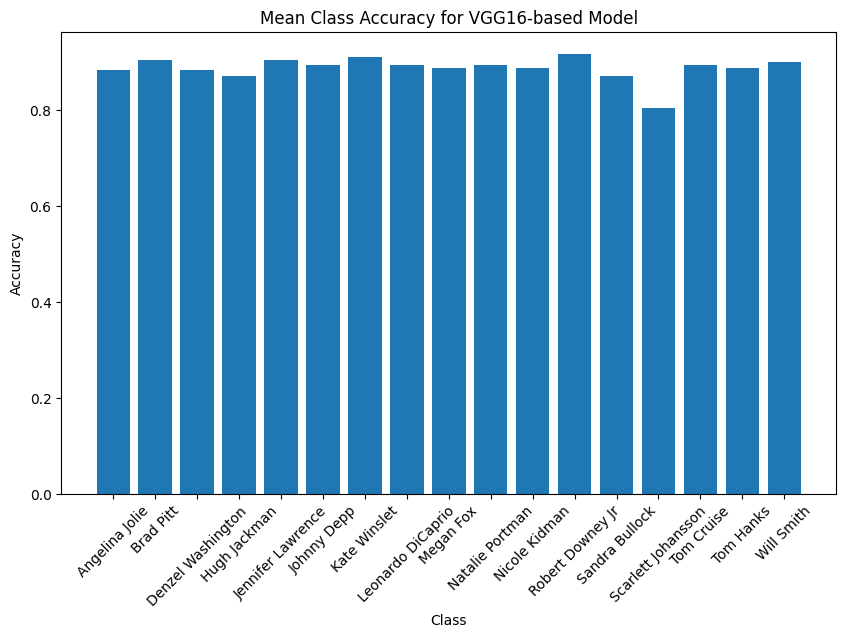

In [46]:
from sklearn.metrics import accuracy_score

# Compute accuracy for each class
class_accuracy = {}
for i in range(len(class_labels)):
    class_accuracy[class_labels[i]] = accuracy_score((y_true == i), (y_pred_classes == i))

# Plot mean class accuracy
plt.figure(figsize=(10, 6))
plt.bar(class_accuracy.keys(), class_accuracy.values())
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Mean Class Accuracy for VGG16-based Model')
plt.xticks(rotation=45)
plt.show()

Saving the model in .h5 file

In [36]:
# Save the model
model_2.save('celeb_face_vgg16_model_with_early_stopping.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
